In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import annotation_analysis as an
from Data import symbol_graph as sg
import text_encoding
from importlib import reload
reload(an); reload(sg); reload(text_encoding)

<module 'text_encoding' from '/home/javierfumanal/Documents/GitHub/context-art-classification/text_encoding.py'>

In [3]:
an.args_dict.dir_dataset = r'/home/javierfumanal/Documents/GitHub/SemArt/'

In [4]:
semart_train = pd.read_csv(an.args_dict.dir_dataset + 'semart_train.csv', encoding = "ISO-8859-1", sep='\t')

In [5]:
descriptions = semart_train['DESCRIPTION']

In [64]:
np.where(semart_train['TITLE'] == 'Portrait of a Woman')

(array([  803,  1019,  1687,  2227,  2391,  2427,  2428,  3529,  3633,
         3732,  3862,  4471,  4720,  4783,  4815,  4831,  6392,  6625,
         6640,  6859,  7143,  7567,  8039,  8129,  8651,  9362,  9489,
         9507,  9674,  9734,  9897, 10000, 10663, 11068, 12013, 12315,
        12633, 12712, 12888, 12973, 13476, 13730, 13809, 13918, 13941,
        13962, 14246, 14994, 15287, 15340, 15394, 15472, 16463, 16508,
        16656, 16806, 17464, 18113, 18125, 18177, 18186, 18392, 18703,
        18915]),)

In [99]:
descriptions[612]

"This unusual subject is taken from the Chronicon Helveticum written by Aegidius Tschudi (1505-72). Whilst out hunting, Graf Rudolf von Habsburg comes across a priest taking the viaticum to the dying, and in a show of piety hands over his horse for the priest to use.The figures kneeling beside the path in the foreground are probably portraits of the patron's family members"

In [94]:
similarities = chosen_coded_semart_train_fcm[612,:] @ chosen_coded_semart_train_fcm.T
np.argsort(similarities)[::-1][0:10]

array([ 1298,  5028, 15537,  5168, 13298, 13294,  8145,  5137, 15600,
        5029])

In [98]:
descriptions[15537]

"The communion, openly, is in both species. The traitor, a purse hanging from his belt, performs an act of charity. The donor-viewer is seriously puzzled.AMbiguity and disguise inform this, the most complex of Tintoretto's Last Suppers"

In [100]:
semart_train['TITLE'][612]

'Rudolf von Habsburg Handing over his Horse to a Priest'

# Modalidad 1: coger las top 100

In [104]:
chosen_coded_semart_train, chosen_coded_semart_val, chosen_coded_semart_test = \
            text_encoding.tf_idf_load_train_text_corpus(an.args_dict.dir_dataset, append='append', k=100)

In [105]:
chosen_coded_semart_train_fcm = text_encoding.fcm_coded_context(
                chosen_coded_semart_train, clusters=128)

In [38]:
word_names

array(['painting', 'painted', 'st', 'work', 'picture', 'figures', 'left',
       'portrait', 'paintings', 'artist', 'right', 'century', 'life',
       'scene', 'christ', 'painter', 'scenes', 'shows', 'van', 'panel',
       'landscape', 'church', 'composition', 'virgin', 'art', 'subject',
       'figure', 'works', 'light', 'time', 'wall', 'style', 'background',
       'altarpiece', 'portraits', 'known', 'like', 'probably', 'man',
       'small', 'saint', 'hand', 'child', 'large', 'early', 'young',
       'present', 'great', 'john', 'later', 'new', 'seen', 'rome',
       'depicted', 'family', 'years', 'executed', 'depicts', 'panels',
       'woman', 'pictures', 'artists', 'mary', 'fresco', 'view', 'king',
       'painters', 'old', 'chapel', 'central', 'san', 'foreground',
       'commissioned', 'series', 'colour', 'centre', 'master', 'death',
       'group', 'son', 'room', 'period', 'influence', 'saints', 'dutch',
       'ceiling', 'city', 'head', 'madonna', 'example', 'di', 'signed',
  

In [80]:
formatted_argsort = [np.argsort(chosen_coded_semart_train.sum(axis=0))[0, x] for x in range(100)]
print([word_names[x] for x in formatted_argsort])
print(np.sort(chosen_coded_semart_train.sum(axis=0)))

['venice', 'set', 'space', 'paris', 'number', 'way', 'important', 'represents', 'signed', 'di', 'example', 'madonna', 'head', 'city', 'ceiling', 'dutch', 'saints', 'influence', 'period', 'room', 'son', 'group', 'death', 'master', 'centre', 'colour', 'series', 'commissioned', 'foreground', 'san', 'central', 'chapel', 'old', 'painters', 'king', 'view', 'fresco', 'mary', 'artists', 'pictures', 'woman', 'panels', 'depicts', 'executed', 'years', 'family', 'depicted', 'rome', 'seen', 'new', 'later', 'john', 'great', 'present', 'young', 'early', 'large', 'child', 'hand', 'saint', 'small', 'man', 'probably', 'like', 'known', 'portraits', 'altarpiece', 'background', 'style', 'wall', 'time', 'light', 'works', 'figure', 'subject', 'art', 'virgin', 'composition', 'church', 'landscape', 'panel', 'van', 'shows', 'scenes', 'painter', 'christ', 'scene', 'life', 'century', 'right', 'artist', 'paintings', 'portrait', 'left', 'figures', 'picture', 'work', 'st', 'painted', 'painting']
[[  880   899   910 

In [87]:
descriptions[480]

'The lady beside a fountain, three-quarter length, is said to be the Marchioness of Montchevreuil'

In [83]:
np.where((chosen_coded_semart_train.sum(axis=1)==0))

(array([  137,   263,   352,   391,   409,   443,   480,   496,   498,
          591,   646,   700,   712,   719,   763,   844,   852,   892,
          971,  1021,  1135,  1220,  1252,  1285,  1298,  1318,  1341,
         1397,  1398,  1412,  1439,  1533,  1582,  1663,  1745,  1825,
         1926,  1965,  2006,  2041,  2099,  2134,  2169,  2191,  2249,
         2255,  2286,  2350,  2592,  2601,  2606,  2674,  2693,  2714,
         2752,  2787,  2802,  2894,  2913,  2964,  2974,  3192,  3281,
         3324,  3378,  3469,  3576,  3701,  3748,  3786,  3851,  3873,
         3989,  4057,  4338,  4353,  4389,  4434,  4498,  4510,  4556,
         4602,  4662,  4716,  4913,  4994,  5028,  5029,  5137,  5168,
         5196,  5287,  5353,  5370,  5379,  5431,  5453,  5471,  5518,
         5594,  5697,  5740,  5747,  5793,  5826,  5970,  5984,  6009,
         6010,  6015,  6272,  6308,  6324,  6326,  6327,  6337,  6371,
         6386,  6398,  6474,  6487,  6537,  6546,  6551,  6566,  6569,
      

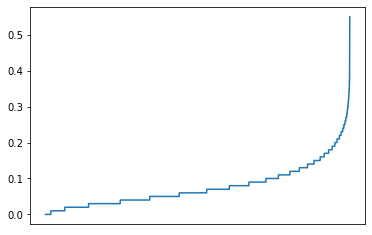

In [41]:
plt.plot(np.sort((chosen_coded_semart_train>0).mean(axis=1), axis=0)); plt.xticks([]);
plt.savefig('100_density.pdf')

In [42]:
print(np.argsort(chosen_coded_semart_train.mean(axis=1), axis=0)[-1])
print(len(descriptions[11309].split()))

[[11309]]
1288


In [43]:
np.mean(chosen_coded_semart_train[11309, :].toarray()>0)

0.49

<AxesSubplot:>

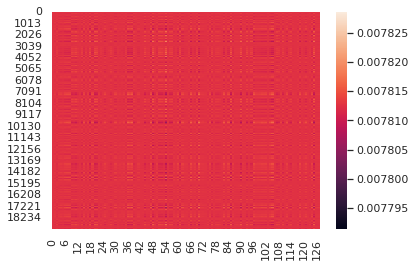

In [106]:
sns.heatmap(chosen_coded_semart_train_fcm)

In [ ]:
similarity = chosen_coded_semart_train_fcm @ chosen_coded_semart_train_fcm.T

In [97]:
183704328 / (19244 * 19244)

0.49605369821920864

## Modalidad 2: coger las que aparecen más de 10 veces

In [44]:
chosen_coded_semart_train, chosen_coded_semart_val, chosen_coded_semart_test, word_names = \
            text_encoding.bow_load_train_text_corpus(an.args_dict.dir_dataset, append='append', k=10, top=False, explain=True)

In [45]:
chosen_coded_semart_train.shape

(19244, 10445)

In [46]:
np.mean(chosen_coded_semart_train.sum(axis=1)>0)

1.0

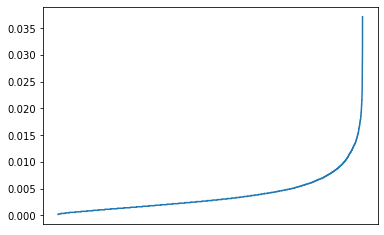

In [47]:
plt.plot(np.sort((chosen_coded_semart_train>0).mean(axis=1), axis=0)); plt.xticks([]);
plt.savefig('Big_density.pdf')

## Análisis comunes

In [69]:
tentative_size = 500
chosen_coded_semart_train, chosen_coded_semart_val, chosen_coded_semart_test, word_names = \
            text_encoding.bow_load_train_text_corpus(an.args_dict.dir_dataset, append='append', k=tentative_size, top=True, explain=True)

In [70]:
most_common_words_sorted = np.argsort(chosen_coded_semart_train.sum(axis=0))
most_common_words_sorted = [most_common_words_sorted[0,x] for x in range(tentative_size)][::-1]

In [71]:
list_words = np.full((tentative_size,), False, dtype=bool)
res = []
for ix, word_ix in enumerate(most_common_words_sorted):
    list_words[word_ix] = True
    paintings_present = np.mean(chosen_coded_semart_train[:, list_words].sum(axis=1)>0)
    #list_words[word_ix] = False
    res.append(paintings_present)


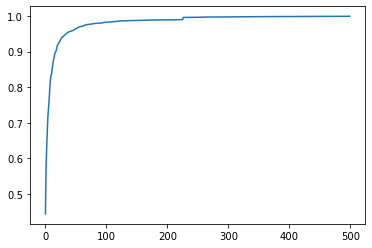

In [72]:
plt.plot(res); plt.savefig('cobertura_' + str(tentative_size) +  '.pdf')

In [68]:
np.where(np.equal(res, 1.0))

(array([3060, 3061, 3062, ..., 9997, 9998, 9999]),)